In [1]:
import pandas as pd
import seaborn as sns #시각화
import matplotlib.pyplot as plt

### Train data 로드

In [2]:
train = pd.read_csv("data_titanic/train.csv", index_col = "PassengerId")

In [3]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.shape

(891, 11)

In [5]:
train["Sex"].groupby(train["Survived"]).value_counts()
# survived를 기준으로 sex의 구분

Survived  Sex   
0         male      468
          female     81
1         female    233
          male      109
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

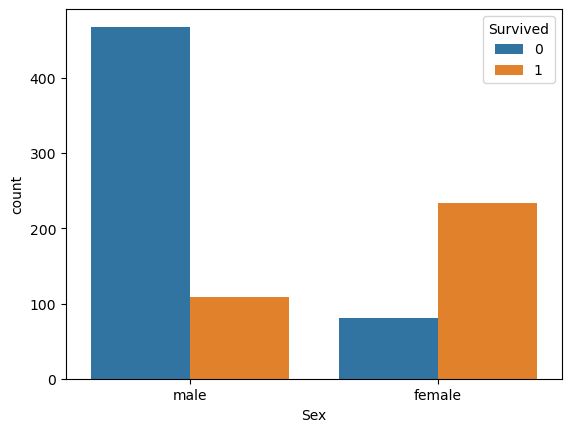

In [6]:
sns.countplot(data = train, x = "Sex", hue = "Survived")

In [7]:
pd.pivot_table(train, index = "Sex", values = "Survived") #평균값계산

,Survived
Sex,
female,0.742038
male,0.188908


<AxesSubplot:xlabel='Pclass', ylabel='count'>

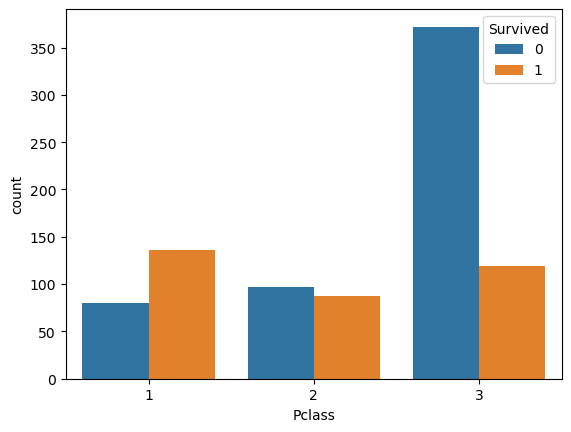

In [8]:
sns.countplot(data = train, x = "Pclass", hue = "Survived")

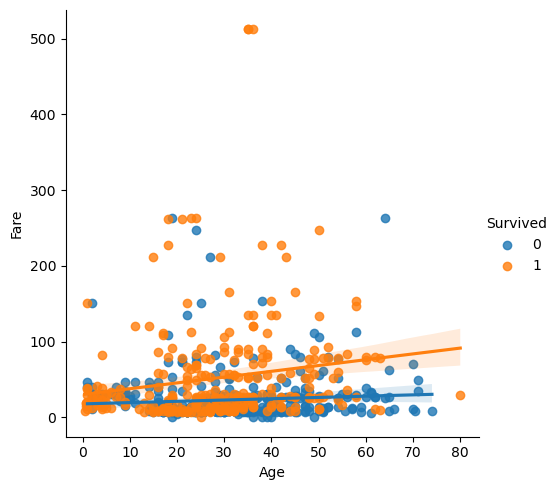

In [9]:
sns.lmplot(data = train, x = "Age", y = "Fare", hue = "Survived", fit_reg = True )

### Pre-processing(전처리)

In [10]:
# Sex (1: female, 0: male)

train["Sex"] == "male"
train.loc[train["Sex"] == "male", "Sex_encode"] = 0

In [11]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,NaN
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,NaN
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0


In [12]:
train.loc[train["Sex"] == "female", "Sex_encode"] = 1

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Name        891 non-null    object 
 3   Sex         891 non-null    object 
 4   Age         714 non-null    float64
 5   SibSp       891 non-null    int64  
 6   Parch       891 non-null    int64  
 7   Ticket      891 non-null    object 
 8   Fare        891 non-null    float64
 9   Cabin       204 non-null    object 
 10  Embarked    889 non-null    object 
 11  Sex_encode  891 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 90.5+ KB


In [14]:
train.isnull().sum()

Survived        0
Pclass          0
Name            0
Sex             0
Age           177
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin         687
Embarked        2
Sex_encode      0
dtype: int64

### Test data 로드

In [15]:
test = pd.read_csv("data_titanic/test.csv", index_col = "PassengerId")

In [16]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [17]:
test.shape

(418, 10)

In [18]:
test["Sex"] == 'male'
test.loc[test["Sex"] == "male", "Sex_encode"] = 0
test.loc[test["Sex"] == "female", "Sex_encode"] = 1

test[["Sex", "Sex_encode"]].head()

,Sex,Sex_encode
PassengerId,,
892,male,0.0
893,female,1.0
894,male,0.0
895,male,0.0
896,female,1.0


## Learning (Decision-tree)의사결정나무

1. feature 선택
2. 예측결과를 정답과 비교하며 학습
3. 의사결정트리 생성

In [19]:
label_name = "Survived"
feature_names = ["Pclass", "Sex_encode"]
# feature_names = ["Pclass", "Sex_encode", "Embarked_C",  "Embarked_Q", "Embarked_S", "FamilySize", "Child", "FamilyType_Tiny", "FamilyType_Normal", "FamilyType_Huge", "Master", "Pclass_12"]

In [20]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1.0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1.0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0


In [21]:
X_train = train[feature_names]
X_train.head()

,Pclass,Sex_encode
PassengerId,,
1,3,0.0
2,1,1.0
3,3,1.0
4,1,1.0
5,3,0.0


In [22]:
X_test = test[feature_names]
X_test.head()

,Pclass,Sex_encode
PassengerId,,
892,3,0.0
893,3,1.0
894,2,0.0
895,3,0.0
896,3,1.0


In [23]:
y_train = train[label_name]
y_train.head()

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
model = DecisionTreeClassifier(max_depth = 4, random_state = 0)
model

DecisionTreeClassifier(max_depth=4, random_state=0)

##### fit : learning by model

In [26]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [27]:
model.score(X_train, y_train)

0.7867564534231201

In [28]:
from sklearn.tree import export_graphviz
import graphviz

## [Graphviz 설치 방법](https://zephyrus1111.tistory.com/123)

In [29]:
feature_names

['Pclass', 'Sex_encode']

In [30]:
export_graphviz(model,
                feature_names=feature_names,
                class_names=['Unsurvived','Survived'],
                out_file="data_titanic/decision-tree.dot")

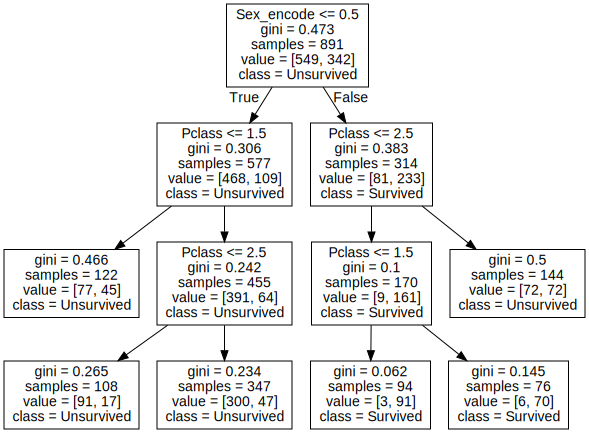

In [31]:
with open("data_titanic/decision-tree.dot") as f:
    dot_graph = f.read()
    
graphviz.Source(dot_graph)

##### predict : prediction

In [32]:
predictions = model.predict(X_test)
predictions[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

## Submission

In [33]:
submission = pd.read_csv("data_titanic/gender_submission.csv", index_col="PassengerId")
submission.head()

,Survived
PassengerId,
892,1
893,0
894,1
895,1
896,0


In [34]:
submission["Survived"] = predictions
submission.head()

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0


In [35]:
# submission.to_csv("data_titanic/submission_test.csv")